# **IMPORTS**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd


importing an example dataset and other important functions from sklearn

# **THE DATA**

In [ ]:
cancer = load_breast_cancer()

Load and return the breast cancer  dataset (classification).
This data set has 569 rows (cases) with 30 numeric features. The outcomes are either 1 - malignant, or 0 - benign.


print(cancer.DESCR) 
print(cancer.feature_names)

To display the description and features of the data set


# **SPLITTING OF DATA**

In [ ]:
X = cancer.data
y = cancer.target
print(cancer.target_names) 


['malignant' 'benign']


split the dataset into training and testing data.X Specifies all of the data and Y is the labelled data.It has only two target values for classification. Either it is malignant of benign.

In [ ]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
print(df[:10])  
print(df.shape) 

   mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0
3        11.42         20.38  ...                  0.17300       0
4        20.29         14.34  ...                  0.07678       0
5        12.45         15.70  ...                  0.12440       0
6        18.25         19.98  ...                  0.08368       0
7        13.71         20.83  ...                  0.11510       0
8        13.00         21.82  ...                  0.10720       0
9        12.46         24.04  ...                  0.20750       0

[10 rows x 31 columns]
(569, 31)


 pandas dataframe specifies the values in table form.

 After targeting the dataset displays First 10 rows from df,also total rows x column
 


# **PLOTTING DATASET**

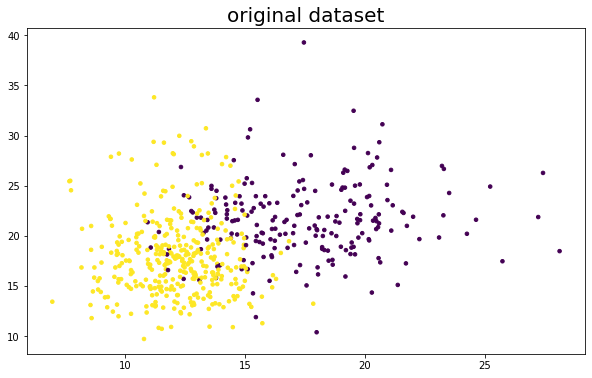

In [ ]:

plt.figure(figsize = (10,6)) 
plt.scatter(X[:,0], X[:,1], c=y, marker= '.', s=50) 
plt.title("original dataset", fontsize=20) 
plt.show()


Creates a figure object,figsize argument takes a tuple of two values, length and breadth(inches).

Mark the parameters in x and y respectively.

**C** is the color sequence.

**Marker** is the shape of the reference.For more reference 
https://matplotlib.org/api/markers_api.html#module-matplotlib.markers

s is the size of the reference.
show function displays all open figures




# **KNN ALGORITHM**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5) 
print(type(knn))

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>


instantiate an object of the KNN Classifier where k=5

In [ ]:
knn.fit(X, y)

fit() method to update the model in order to fit the training set.

In [ ]:
y_pred = knn.predict(X)

Predict the labels for the training data X

In [ ]:
#print(y_pred)
print("KNN = 5 : ", metrics.accuracy_score(y, y_pred))

KNN = 5 :  0.9402460456942003


this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y.

In [ ]:

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
#print(y_pred)
print("KNN = 1 : ",metrics.accuracy_score(y, y_pred))


knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X, y)
y_pred = knn.predict(X)
#print(y_pred)
print("KNN = 11 : ",metrics.accuracy_score(y, y_pred))



KNN = 1 :  1.0
KNN = 11 :  0.9402460456942003


Same method is used difference in the value of k.

In [ ]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


Print the shape of x and y

X is the tuple of training data

y is the tuple of target data

#train-test-split function

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4) 


This splits the entire data into training data and testing data, test size=0.4 means 25% used as testing data.

random_same  is used to guarantee that the split will always be the same. 

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(341, 30)
(228, 30)
(341,)
(228,)


The training set is a subset of the data set used to train a model.

 X_train is the training data set. y_train is the set of labels to all the data in x_train .

 The training set is a subset of the data set used to test a model.

 X_test is the testing data set. y_test is the set of labels to all the data in x_test .

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9078947368421053


Train the model using the training sets and predict the response for test data set.

Accuracy can be computed by comparing actual test set values and predicted values.



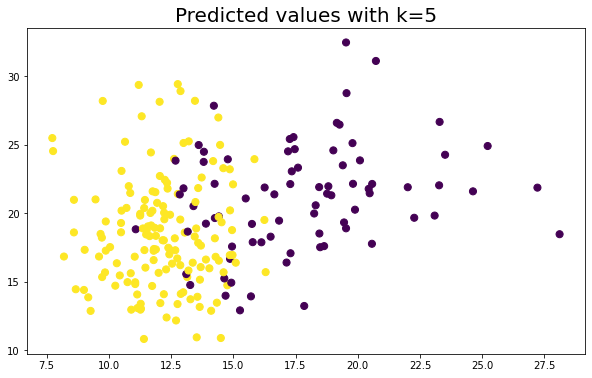

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, marker= 'o', s=50)
plt.title("Predicted values with k=5", fontsize=20)
plt.show()

Refer cell 20 description difference in taking dataset,here we use test data.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9035087719298246


Found accuracy using same method knn classifier where k=1

In [ ]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

[0.9035087719298246, 0.8728070175438597, 0.9166666666666666, 0.9035087719298246, 0.9078947368421053, 0.9122807017543859, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9122807017543859, 0.9122807017543859, 0.9078947368421053, 0.9122807017543859, 0.9078947368421053, 0.9122807017543859, 0.9078947368421053, 0.9078947368421053, 0.8991228070175439, 0.8991228070175439, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632]


We use a loop through the range 1 to 26,use knn algorithm and predict the accuracys of multiple k's.
We created a list[] scores to store the values of accuracys


Text(0, 0.5, 'Testing Accuracy')

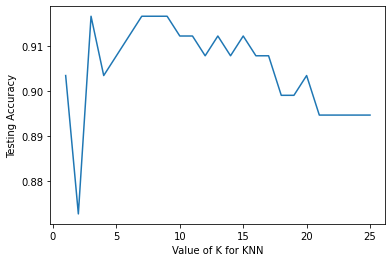

In [ ]:
%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Plotting the graphs for all values of k with accuracy.
